# Tavis-Cummings model: coupling multiple 'atoms' to a single cavity

## Tavis-Cummings Hamiltonian

$$
H_{TC} = \omega_r \hat{a}^{\dagger} \hat{a} + \sum_{i = 1}^{N} \left( \frac{1}{2} \omega_i \hat{\sigma}^{\dagger}_{i}\hat{\sigma}_{i} + g (\hat{a} \hat{\sigma}^{\dagger}_{i} + \hat{a}^\dagger \hat{\sigma}_{i})\right)
$$

where $\hat{\sigma}^\dagger_i$, and $\hat{\sigma}_i$ are the operators defined above for the ith atom. In Module 2 we have mainly considered the case $N = 2$.

You can use this notebook to study the spectral response of the system both in transmission and reflection.

## Transmission spectrum for the coupled cavity system

Following the process outlined in \[1\] a non-Hermitian Hamiltonian can be written to include the cavity and ion loss rates, $\kappa$ and $\gamma_i$ respectively.

$$
H_{TC} = (\omega_r - i\frac{\kappa}{2}) a^\dagger a + (\omega_1 + \Delta + \frac{\delta}{2} -i\frac{\gamma_1}{2}) \sigma^\dagger_1 \sigma_1 + (\omega_2 + \Delta - \frac{\delta}{2} -i\frac{\gamma_2}{2}) \sigma^\dagger_2 \sigma_2 + [a^\dagger (g_1\sigma_1 + g_2\sigma_2) + \mathrm{h.c}]
$$

By solving the Heisenberg Langevin equations of motion in the low excitation approximation we can write the intensity transmission function as 

$$
T(\omega) = \dfrac{\kappa}{4|D|^2}
$$

where

$$
D = i(\omega_c - \omega) + \frac{\kappa}{2} - \left(\frac{|g_1|^2}{-i(\omega_c - \omega + \Delta - \frac{\delta}{2})-\frac{\gamma_1}{2}} + \frac{|g_2|^2}{-i(\omega_c - \omega + \Delta + \frac{\delta}{2})-\frac{\gamma_2}{2}} \right)
$$

\[1\] M. Tavis, F. W. Cummings, Exact Solution for an N -Molecule—Radiation-Field Hamiltonian. Phys. Rev. 170, 379–384 (1968). doi:10.1103/PhysRev.170.379


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# use inline plotting
%matplotlib inline

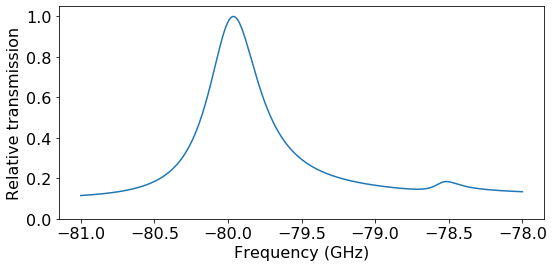

In [53]:
# Figure 2A
# System parameters with all units in 2*pi*GHz

delw = 2*np.pi*np.linspace(-81, -78, 3000);

kappa = np.pi*30; # Cavity loss rate - note we assume the only loss channels are to the input and output waveguides
kappa_a = kappa/2; # Input 'mirror' coupling rate
kappa_b = kappa/2; # Output 'mirror' coupling rate

g = 2*np.pi*7.3; # Cavity-'atom' coupling rate
g1 = g; # Both SiV- (1)
g2 = g; # and SiV- (2) have the same coupling rate

Del = 2*np.pi*78.6; # Detuning between the centre of mass frequency and the cavity resonance
delta = -2*np.pi*0.56; # Detuning between the two SiV- centres

gamma = 2*np.pi*0.19; # 'Atom' loss rate
gamma1 = gamma; # Both SiV- (1)
gamma2 = gamma; # and SiV- (2) have the same coupling rate

# Leakage of coherent laser light into the detection path adds a noise term
# modelled by the parameters A and theta, the amplitude and phase of the background light, respectively
A = 0.31;
theta = -0.76;

# Complex denominator for the transmission function
D = 1j*(delw) + (kappa_a + kappa_b)/2 - np.absolute(g1)**2/(-1j*(delw + Del - delta/2)-gamma1/2) - np.absolute(g2)**2/(-1j*(delw + Del + delta/2)-gamma2/2);
 
t = np.sqrt(kappa_a*kappa_b)/D; # Field transmission function
T = np.absolute(t+A*np.exp(1j*theta))**2; # Intensity transmission function

r = kappa_a/D - 1; # Field reflection function
R = np.absolute(r)**2; # Intensity reflection function

fig = plt.figure(figsize=(8, 4))
plt.rc('font', size=16)

plt.plot(delw/(2*np.pi),T/np.max(T))
# plt.plot(delw/(2*np.pi),R/np.max(R))

plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Relative transmission')

plt.ylim(0, 1.05)

fig.tight_layout()